# Week 6: Day 2 - Logistic Regression


### A Simple Example in Python

In [ ]:
import numpy as np
from PIL import Image
from IPython.display import display

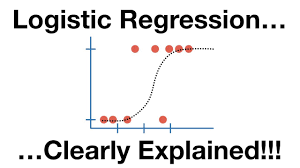

In [ ]:
im=Image.open('logistic regression.png')
display(im)
array=np.array

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). 

In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Appply fix to the statsmodels libries
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [ ]:
# load the dataset
raw_data = pd.read_csv('C:\\Users\\Zachary_B\\Desktop\\dataset\\2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [ ]:
# Like dummies we can convert Yes/No to 1s and 0s.
data = raw_data.copy()
data['Admitted'] =data['Admitted'].map({'Yes':1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [ ]:
# Variables
y = data['Admitted']
x1 = data['SAT']

<function matplotlib.pyplot.show(close=None, block=None)>

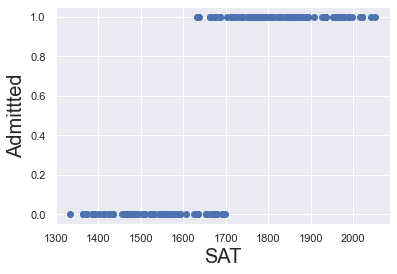

In [ ]:
# Let plot the data
# Scatter plot

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admittted',fontsize=20)
plt.show

### Basics of logistic regression

<function matplotlib.pyplot.show(close=None, block=None)>

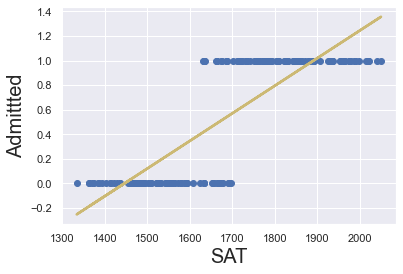

In [ ]:
# plot with a regression line

x = sm.add_constant(x1)
reg_lin= sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y,color= 'C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color= 'C8')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admittted',fontsize=20)
plt.show

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<function matplotlib.pyplot.show(close=None, block=None)>

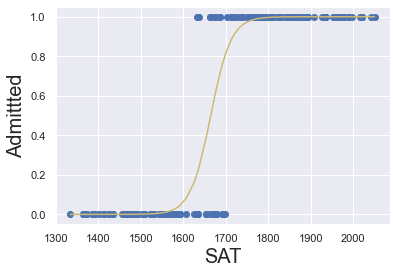

In [ ]:
# plot with a logistic regression curve

reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color= 'C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admittted',fontsize=20)
plt.plot(x_sorted,f_sorted,color= 'C8')
plt.show


## An invaluable coding tip

In [ ]:
# summary
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 May 2022   Pseudo R-squ.:                  0.7992
Time:                        12:20:55   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Understanding the tables

In [ ]:
# You may want to compare the log_likelihood of your model with the LL-null to see if your model has any explanatory power.

x0 = np.ones(168)
reg_log = sm.Logit(y,x0)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Mon, 16 May 2022   Pseudo R-squ.:               7.410e-11
Time:                        12:20:56   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

LLR(log likelihood ratio): measures if our model is statistically different from the LL-null a.k.a a usuless model.
Pseudo R-squred: a good pseudo R-squared is between 0.2 and 0.4. This measure is mostly useful for comparing variations of the same model. Different models will have
completly different and imcompatable Pseudo R-squared.

## Binary predictors in a logistic regression*
In the same way that we created dummies for a logistic regression, we can use binary prediction in a logistic regression

In [ ]:
# Load dataset
raw_data = pd.read_csv('C:\\Users\\Zachary_B\\Desktop\\dataset\\2.02. Binary predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [ ]:
# let map the variables
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data['Gender'] = data['Gender'].map({'Female':1, 'Male':0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


## Binary predictors in a logistic regression*

In [ ]:
# declearing the dependent and independent variabels 

y = data['Admitted']
x1 = data['Gender']

In [ ]:
# Regression

x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 May 2022   Pseudo R-squ.:                  0.1659
Time:                        12:20:56   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

In [ ]:
np.exp(2.0786)

7.993270498536442

In [ ]:
# SAT wan an outstanding predictor

y = data['Admitted']
x1 = data[['SAT','Gender']]

In [ ]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 16 May 2022   Pseudo R-squ.:                  0.8249
Time:                        12:20:57   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:

np.exp(1.9449)

6.992932526814459

## Calculating the accuracy of the model

In [ ]:
# sm.logitresults.predict() returns the values predicted by our model 
results_log.predict()

array([2.24098643e-06, 9.98264069e-01, 9.99997581e-01, 2.25470272e-01,
       2.48392751e-02, 9.92249420e-01, 9.96544212e-01, 9.99963261e-01,
       9.99971204e-01, 1.48031753e-02, 9.99875812e-01, 9.99951185e-01,
       7.60867651e-01, 2.33384671e-06, 5.96283811e-01, 9.99834996e-01,
       1.14446654e-01, 1.18626448e-01, 5.05147726e-01, 9.99865308e-01,
       9.99999366e-01, 9.99997048e-01, 1.71939595e-04, 5.61635704e-03,
       9.68663798e-01, 9.99644611e-01, 4.84851641e-01, 9.91962775e-01,
       9.99828160e-01, 9.94609023e-01, 1.15028367e-04, 8.32585363e-01,
       2.47449367e-01, 9.99998840e-01, 9.98847293e-01, 9.99372736e-01,
       3.12716933e-01, 9.99932453e-01, 2.32639633e-01, 5.29744519e-05,
       1.95739604e-02, 4.54521689e-01, 9.99956956e-01, 2.97763113e-06,
       9.94178832e-01, 1.77714430e-05, 9.93914956e-01, 2.29360536e-04,
       3.30501192e-04, 6.89914934e-03, 4.24966754e-03, 9.99999657e-01,
       9.23952460e-01, 2.28569785e-02, 9.99994550e-01, 5.47478329e-06,
      

In [ ]:
# lets apply the formatter

np.set_printoptions(formatter={'float': lambda x: '{0:0.2f}'.format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [ ]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [ ]:
# sm.logitresults_pred_tabel() returns a table which compares predicted and actual values
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [ ]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [ ]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

## Testing the model

In [ ]:
# Testing the model and acessing its accuracy

test = pd.read_csv('C:\\Users\\Zachary_B\\Desktop\\dataset\\2.03. Test dataset.csv')
test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


In [ ]:
test['Admitted'] = test['Admitted'].map({'Yes':1, 'N0':0})
test['Gender'] = test['Gender'].map({'Female':1, 'Malw':0})
test

,SAT,Admitted,Gender
0,1323,NaN,NaN
1,1725,1.0,1.0
2,1762,1.0,1.0
3,1777,1.0,NaN
4,1665,NaN,NaN
5,1556,1.0,1.0
6,1731,1.0,1.0
7,1809,1.0,1.0
8,1930,1.0,1.0
9,1708,1.0,NaN


In [ ]:
# wewill use our model to make prediction base on the test data
# sm.logitresults.predict() returns the values predicted by our model 
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


In [ ]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'], axis=1)
test_data = sm.add_constant(test_data )
# test_data = test_data[x.columns.values]
test_data 

,const,SAT,Gender
0,1.0,1323,NaN
1,1.0,1725,1.0
2,1.0,1762,1.0
3,1.0,1777,NaN
4,1.0,1665,NaN
5,1.0,1556,1.0
6,1.0,1731,1.0
7,1.0,1809,1.0
8,1.0,1930,1.0
9,1.0,1708,NaN


In [ ]:
# confusion matrix

def confusion_matrix(data,actual_values,model):
  # predict the model using the logit function
    pred_values = model.predict(data)
# specify the bin 
    bins=np.array([0,0.5,1]) 
# create a histogram, where if valuesare between 0 and 0.5 tell will be consider 0, if they are betwen 0.5 and 1 they will be consider 1
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    # calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    # return the confusion matrix and the accuracy
    return cm, accuracy

In [ ]:
cm = confusion_matrix(test_data,test_actual,results_log)
cm

(array([[0.00, 0.00],
        [1.00, 9.00]]),
 0.9)

In [ ]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,0.0,0.0
Actual 1,1.0,9.0


In [ ]:
print('Missclassification rate: '+str((1+1)/19))

Missclassification rate: 0.10526315789473684
